# **Разведочный анализ данных (EDA)**

**Загрузка и предварительный обзор данных**

In [82]:
# сделаем предварительный обзор данных
print("Первые 10 строк данных:")
print(data.head(10))
# посмотрим информацию о типах данных и количестве ненулевых значений
print("\nИнформация о данных:")
print(data.info())


Первые 10 строк данных:
        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1
5  24904.06414  57.471607    15.498598        0.000622        0
6  48430.35961  26.809132  5722.581981        0.118161        0
7  24500.14198  32.897548  2971.003310        0.121265        1
8  40654.89254  55.496853  4755.825280        0.116980        0
9  25075.87277  39.776378  1409.230371        0.056199        0

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age 

**Проведем анализ пропущенных значений**

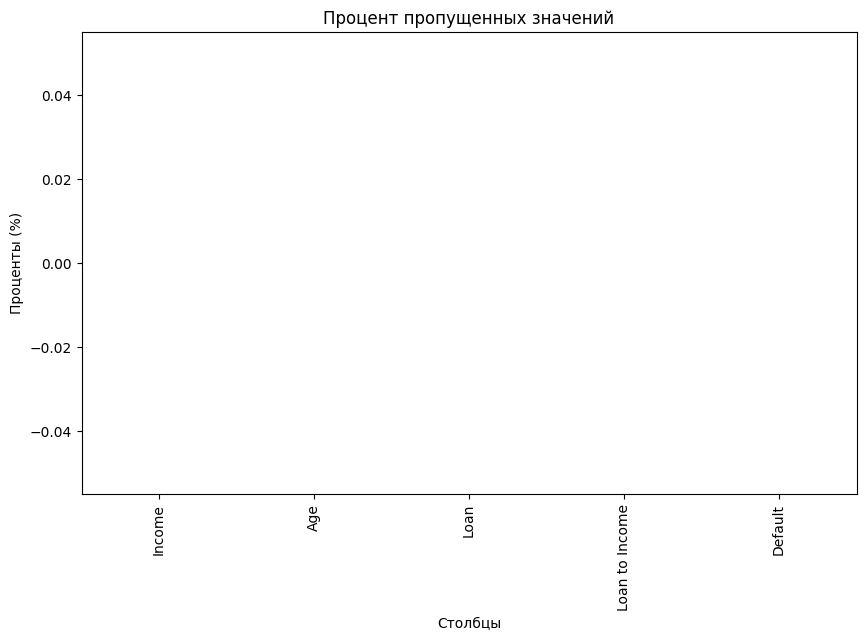

In [83]:
# Визуализируем пропущенные значения
plt.figure(figsize=(10, 6))
missing_values_percentage.plot(kind='bar')
plt.title('Процент пропущенных значений')
plt.xlabel('Столбцы')
plt.ylabel('Проценты (%)')
plt.show()





**Построим диаграммы попарного распределения признаков**

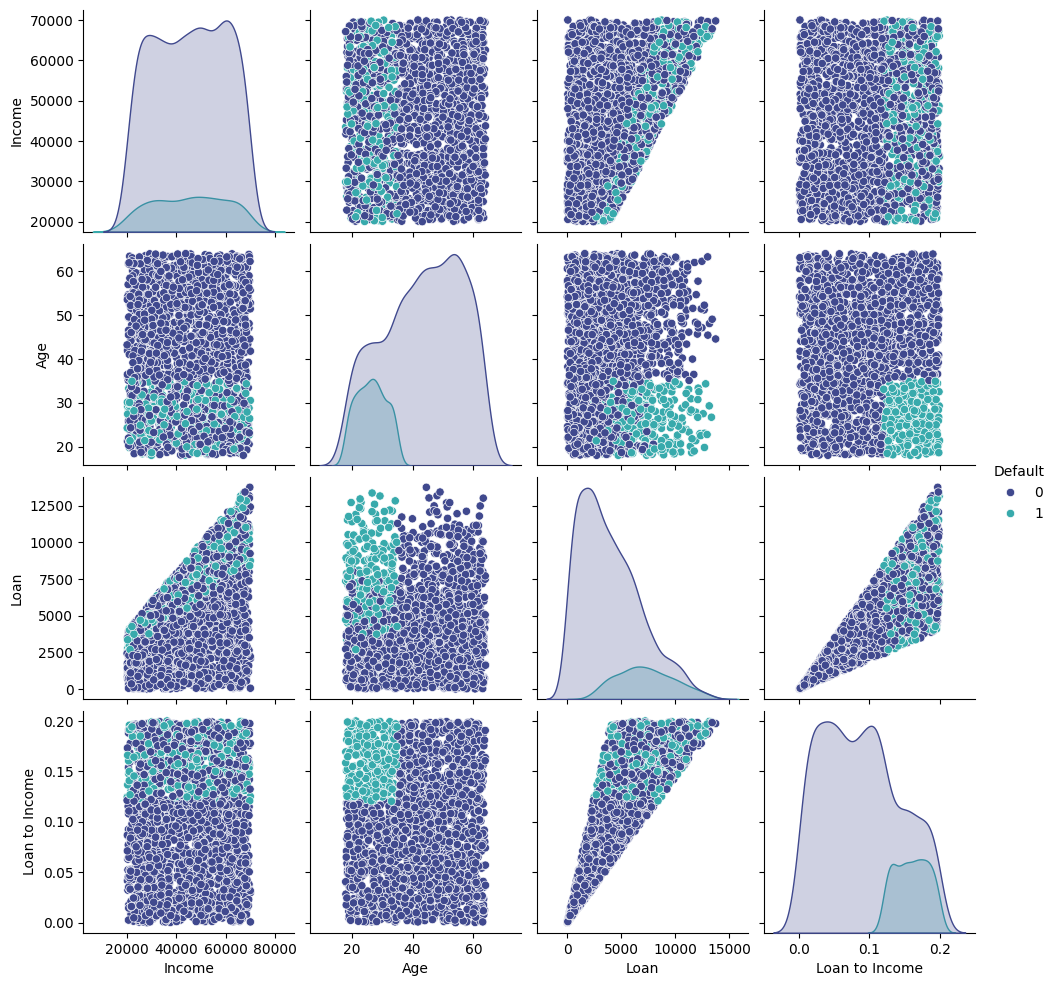

In [84]:
sns.pairplot(data, hue='Default', palette="mako", vars=['Income', 'Age', 'Loan', 'Loan to Income'])# диаграммы попарного распредления признаков 'Income', 'Age', 'Loan', 'Loan to Income'

plt.show()



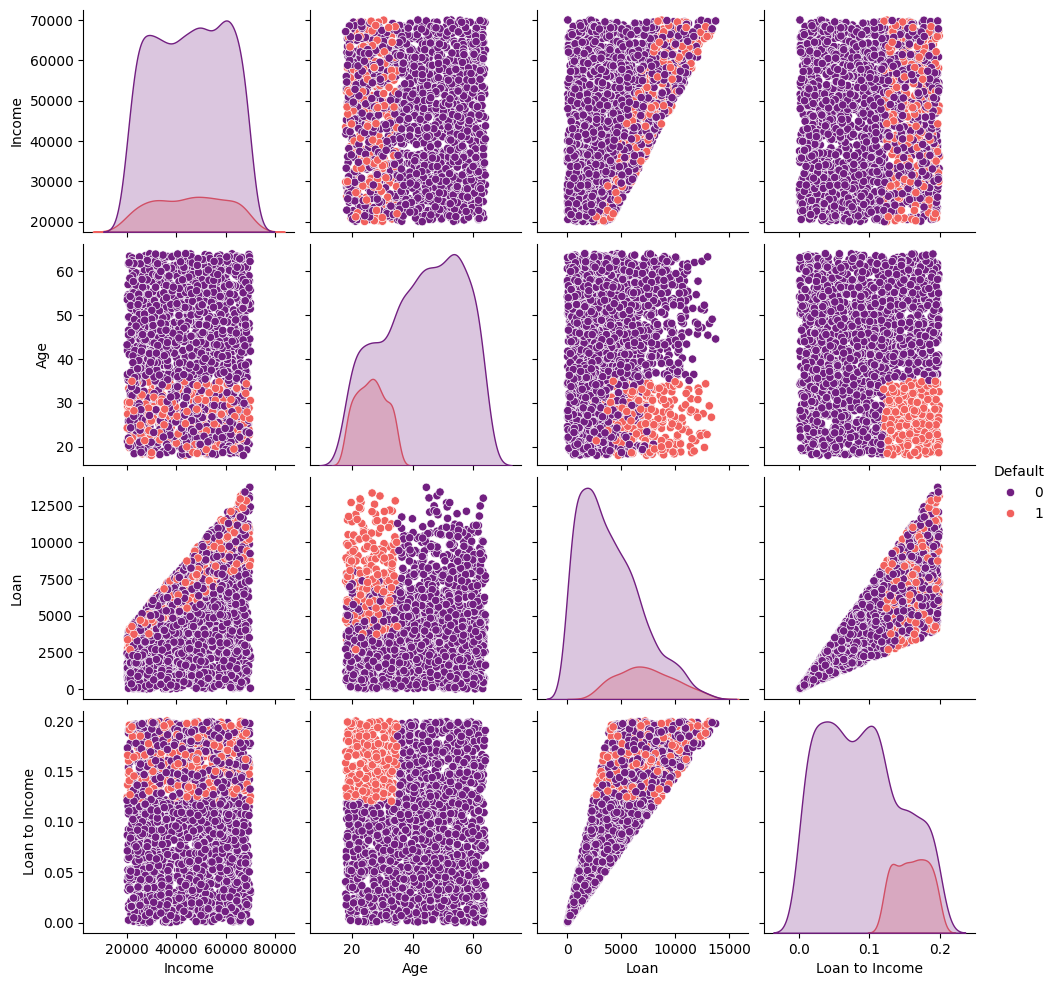

In [85]:
# График попарного распределения всех признаков и таргета
sns.pairplot(data, hue='Default', palette="magma")
plt.show()





*   Проанализировав парные графики, можно сделать вывод,  ни один из рассматриваемых признаков не является достаточно надёжным для построения точных предсказаний, поскольку границы классов на графиках пересекаются.
*    При сочетании определённых признаков, границы классов становятся более чёткими, что подтверждают графики с сочетанием разных признаков.

Это значит, что для повышения точности прогнозов необходимо использовать более сложные методы анализа данных или комбинировать несколько признаков.


# **Корреляционный анализ**

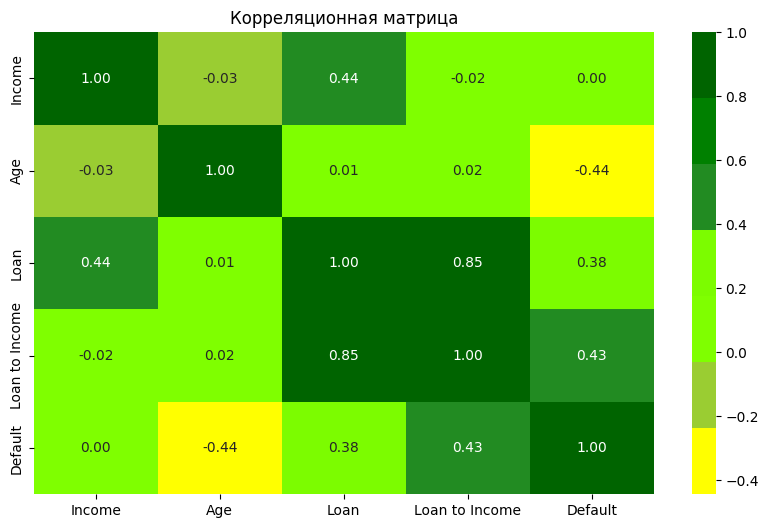

In [86]:
correlation_matrix = data.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=['yellow', 'yellowgreen', 'chartreuse', 'lawngreen', 'forestgreen', 'green', 'darkgreen'], fmt=".2f")
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()



*   Анализ матрицы корреляций позволяет увидеть сильную положительную корреляцию между "Loan" и "Loan to Income" (0.85), что вполне ожидаемо, т.к. при высоком отношении суммы кредита к доходу клиента сумма кретита тоже высокая.
*   Отрицательная корреляция есть между  признаками "Loan to Income" и "Income" (-0,02). Это может быть связано с тем, что при увеличении дохода клиента снижается его потребность в кредите. Это происходит потому, что клиент становится более платёжеспособным и может покрыть свои расходы без привлечения заёмных средств. В результате отношение суммы кредита к доходу уменьшается.

*   Также отрицательная корреляция есть между  признаками "Age" и "Income" (-0,03), может отражать как общие тенденции на рынке труда, так и индивидуальные стратегии карьерного роста и развития, в т.ч изменение структуры занятости и доходов в разных возрастных группах (начинающие молодые специалисты могуи иметь более низку заработную плату).
*   Между "Age" и "Default" наблюдается отрицательная корреляция (-0.44), на основании которой можно предположить, что с увеличением возраста дефолт менее вероятен.
*   Анализ взаимосвязи переменной «Default» с другими факторами показывает, что корреляция между ними не слишком сильная. Это указывает на сложность определения причин, которые могут привести к дефолту.


# **Анализ баланса классов**

In [87]:
class_distribution = data['Default'].value_counts()
class_distribution

,count
Default,
0,1717
1,283


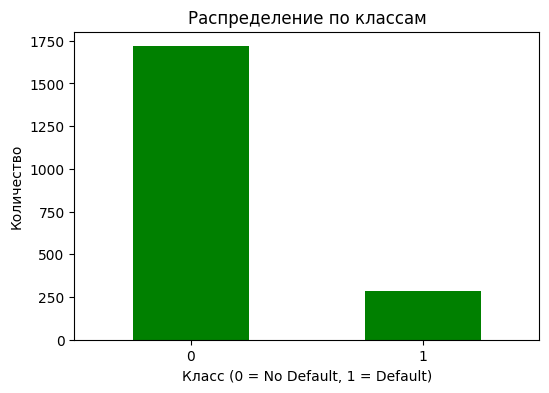

In [88]:
# Визуализация распределения классов
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='green')
plt.title('Распределение по классам')
plt.xlabel('Класс (0 = No Default, 1 = Default)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()


Анализ визуализации данных показывает, что существует значительный дисбаланс между количеством представителей разных классов. Класс «Не дефолт» (0) существенно превосходит по численности класс «Дефолт» (1). Это может привести к искажению результатов модели, поскольку она может быть смещена в сторону более многочисленного класса. Чтобы избежать этого, необходимо использовать методы балансировки классов.

**Заключение и выводы**

*   Отсутствие большого количества пропусков в данных позволяет уверенно проводить анализ и создавать модели.
*   Парные графики наглядно показывают разделение между классами, что может помочь в выборе методов классификации.
*   Данные имеют выраженный дисбаланс. Использование, например, методов обработки на основе деревьев, которые более устойчивы к несбалансированным данным, могло бы помочь решить эту проблему. Возможно применение таких методов, как увеличение класоов.
*   Наблюдается сильная положительную корреляцию между "Loan" и "Loan to.
 Это может быть полезно при создании новых алгоритмов, не забывая, что корреляция не подразумевает причинно-следственной связи.
Дальнейшее исследование данных нужно проводить с учётом указанных факторов,используя современные методы обработки и обучения моделей, тогда можно ожидать более точные прогнозы.









